## VIDEO GAME SALES ANALYSIS

# Introduction
In this Video Game Sales Analysis, we will explore and analyze a dataset containing information about video games with sales. The dataset was downloaded from Kaggle, a public data source.

# Libraries Used
For this Analysis, we will be using the following Python libraries: 

***Numpy for numerical operations and calculations***

***Pandas for data manipulation and analysis***

***Matplotlib for data visualization***

***seaborn for creating informative and attractive statistical graphics.***


# Dataset Description
The dataset consists of the following fields:

***Rank: The ranking of overall sales for each game***

***Name: The name of the video game.***

***Platform: The platform on which the game was released (e.g., PC, PS4, Xbox One, etc.).***

***Year: The year of the game’s release.***

***Genre: The genre of the video game (e.g., Action, Sports, RPG, etc.).***

***Publisher: The publisher of the video game.***

***NA_Sales: Sales in North America (in millions).***

***EU_Sales: Sales in Europe (in millions).***

***JP_Sales: Sales in Japan (in millions).***

***Other_Sales: Sales in the rest of the world (in millions).***

***Global_Sales: Total worldwide sales (sum of all regional sales).***

__The dataset contains 16,598 records, with 2 records dropped due to incomplete information.__

# Data Cleaning

In [1]:
# import neccesary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the data
df = pd.read_csv('vgsales.csv')

In [3]:
# first five rows to understand structure of data
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#display information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# check for null values
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Remove all missing values from year instead of replacing it because missing values need to be filled with an exact value → impossible to fill it with
0 or with an average value.
Fill "Publisher" column with "unknown" because it is difficult to assume.

In [6]:
# fill publisher missing rows
df['Publisher'].fillna('Unknown', inplace=True)

In [7]:
# drop missing values
df = df.dropna()

In [8]:
#check for changes in null handling
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
# descriptive statistics of the data
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# ANALYSIS

What are the top 10 best-selling games of all time based on global sales?

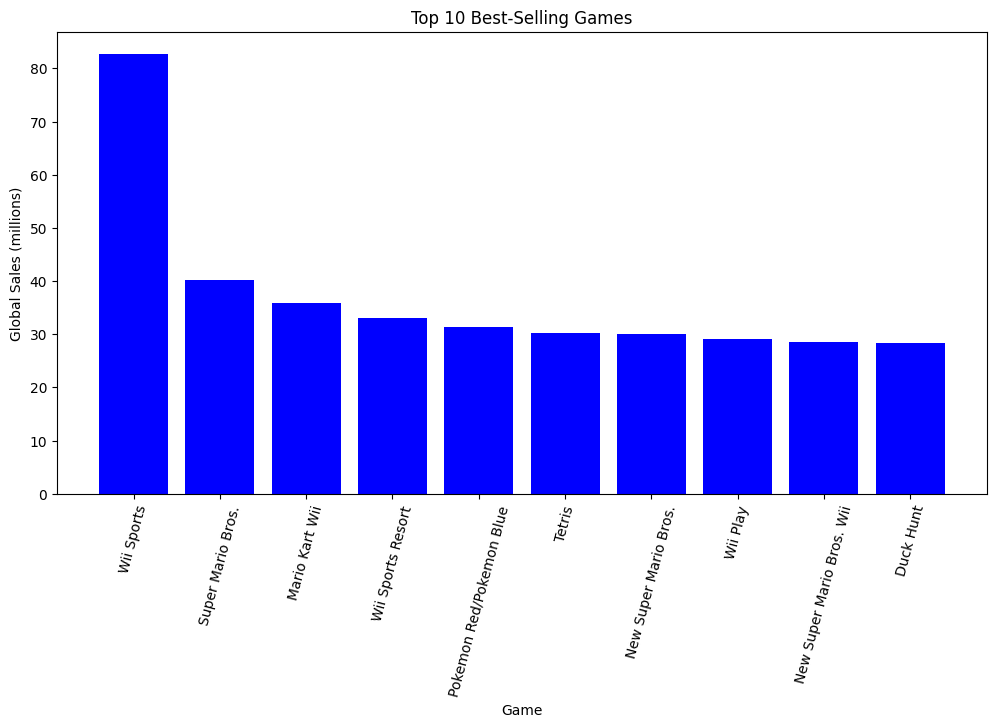

In [10]:
# Sort the dataset by 'Global_Sales' in descending order and select the top 10
top_10_games = df.sort_values(by='Global_Sales', ascending=False).head(10)
# Create a bar chart to visualize the global sales of top 10 games
plt.figure(figsize=(12, 6))
plt.bar(top_10_games['Name'], top_10_games['Global_Sales'], color='blue')
plt.xlabel('Game')
plt.ylabel('Global Sales (millions)')
plt.title('Top 10 Best-Selling Games')
plt.xticks(rotation=75)
plt.show()

Which gaming platform (e.g., PC, PS4, Xbox, etc.) has the highest total sales?

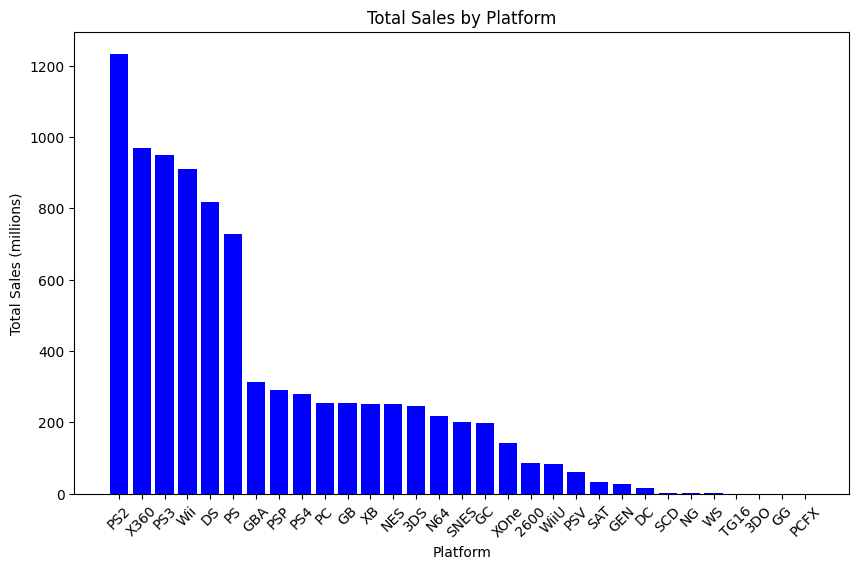

In [11]:
# Group the data by 'Platform' and calculate the sum of global sales for each platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()
# Sort the platforms based on total sales in descending order
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False)
# Create a bar chart to visualize total sales by platform
plt.figure(figsize=(10, 6))
plt.bar(platform_sales['Platform'], platform_sales['Global_Sales'], color='blue')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Platform')
plt.xticks(rotation=45)
plt.show()

What are the most popular genres of video games in terms of global sales?

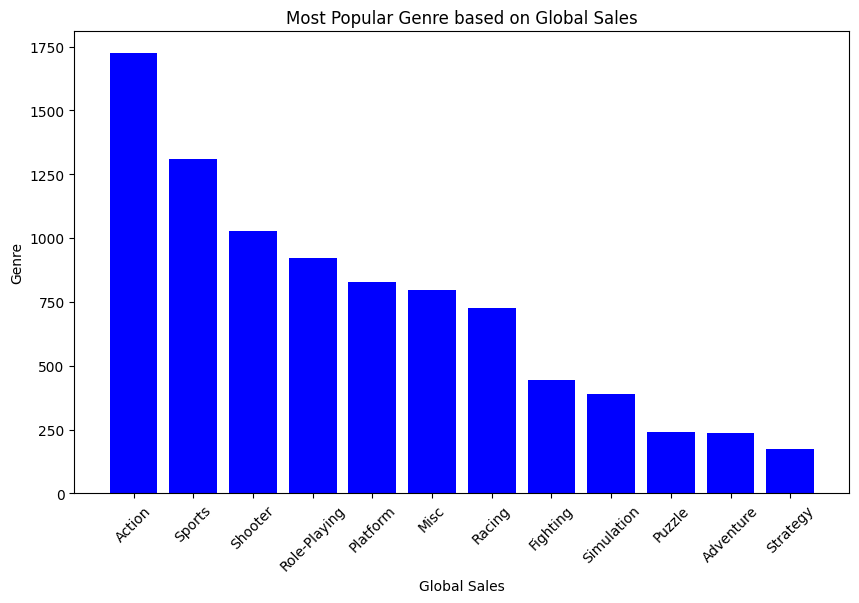

In [12]:
# Group the data by 'Genre' and calculate the sum of global sales for each genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()
# Sort the genres based on total sales in descending order
genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)
# Create a bar chart to visualize genre popularity
plt.figure(figsize=(10, 6))
plt.bar(genre_sales['Genre'], genre_sales['Global_Sales'], color='Blue')
plt.xlabel('Global Sales')
plt.ylabel('Genre')
plt.title('Most Popular Genre based on Global Sales')
plt.xticks(rotation=45)
plt.show()

Which publishers have released the most successful games in terms of global sales?

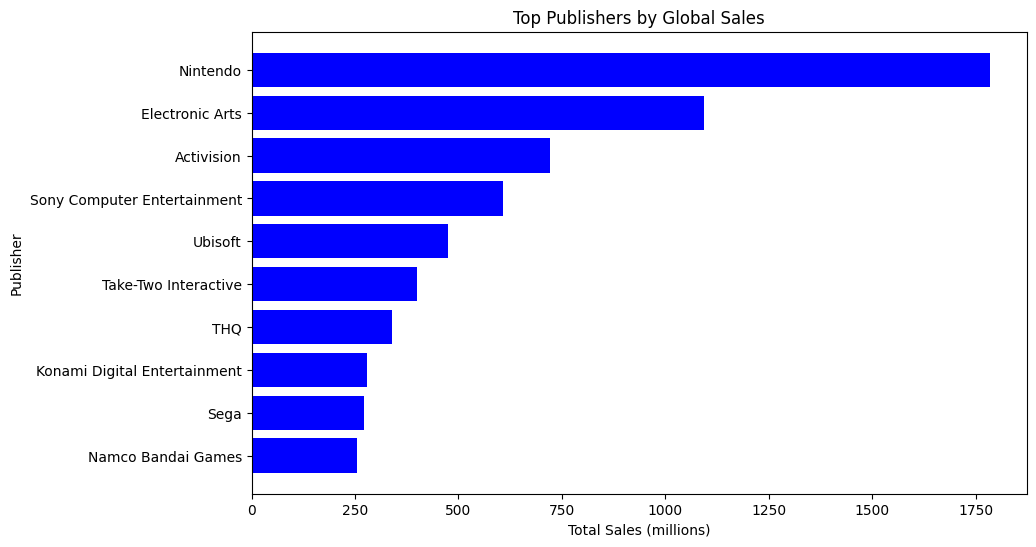

In [13]:
# Group the data by 'Publisher' and calculate the sum of global sales for each publisher
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().reset_index()
# Sort the publishers based on total sales in descending order
publisher_sales = publisher_sales.sort_values(by='Global_Sales', ascending=True).tail(10)  # Sort in ascending order and take the top 10
# Create a horizontal bar chart to visualize publisher performance
plt.figure(figsize=(10, 6))
plt.barh(publisher_sales['Publisher'], publisher_sales['Global_Sales'], color='Blue')
plt.xlabel('Total Sales (millions)')
plt.ylabel('Publisher')
plt.title('Top Publishers by Global Sales')
plt.show()


Which region (North America, Europe, Japan, Rest of the World) contributes the most to global video game sales?

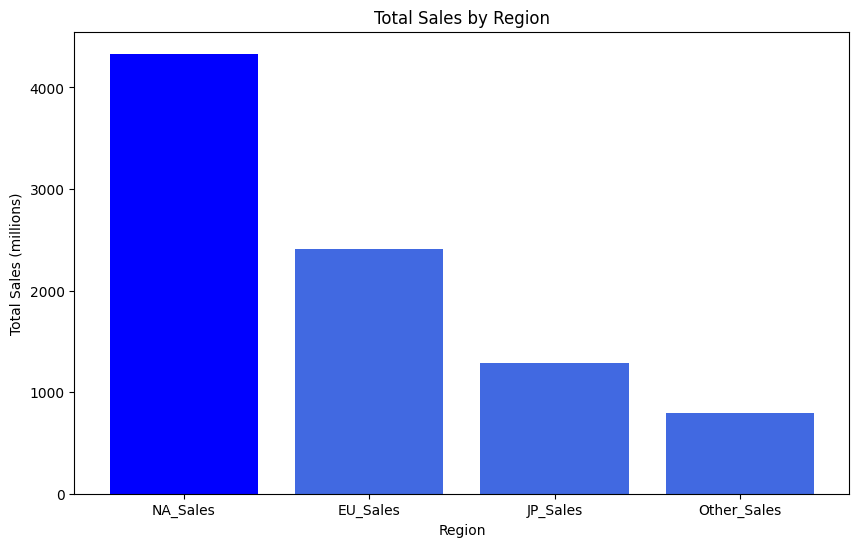

In [14]:
# Calculate the total sales for each region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
# Create a stacked bar chart to visualize sales by region
plt.figure(figsize=(10, 6))
plt.bar(region_sales.index, region_sales.values, color=['Blue','royalblue', 'royalblue', 'royalblue'])
plt.xlabel('Region')
plt.ylabel('Total Sales (millions)')
plt.title('Total Sales by Region')
plt.show()

Which genres are most popular on specific gaming platforms?

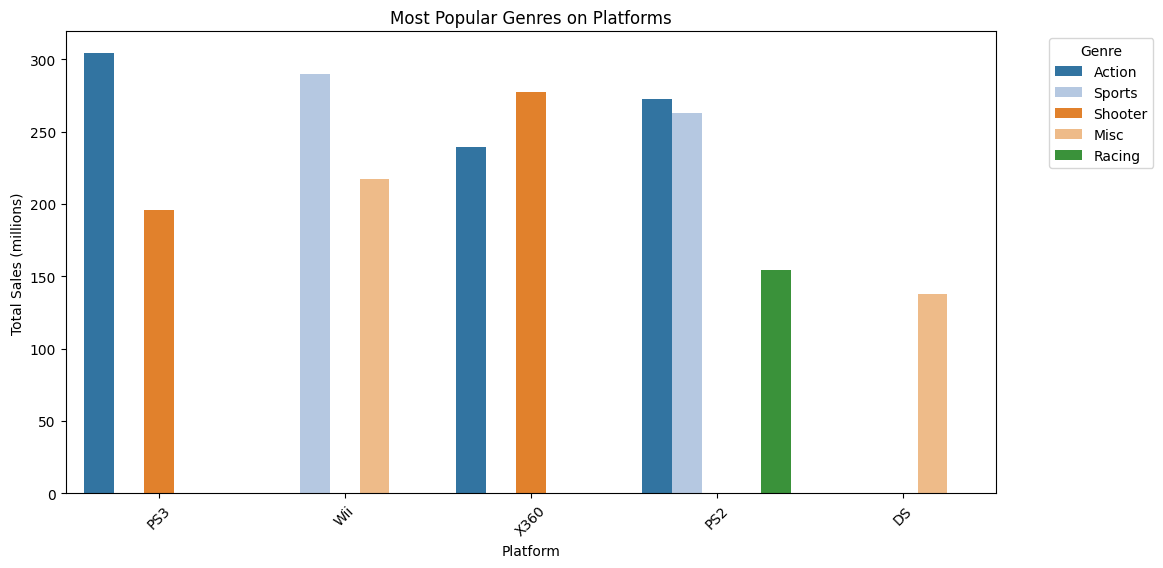

In [15]:
# Group the data by 'Platform' and 'Genre' and calculate the sum of global sales for each combination
platform_genre_sales = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()
# Create a grouped bar chart to visualize genre popularity on gaming platforms
platform_genre_sales = platform_genre_sales.sort_values(by='Global_Sales', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Global_Sales', hue='Genre', data=platform_genre_sales, palette='tab20')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.title('Most Popular Genres on Platforms')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

How have video game sales evolved over the years? Are they increasing or decreasing?

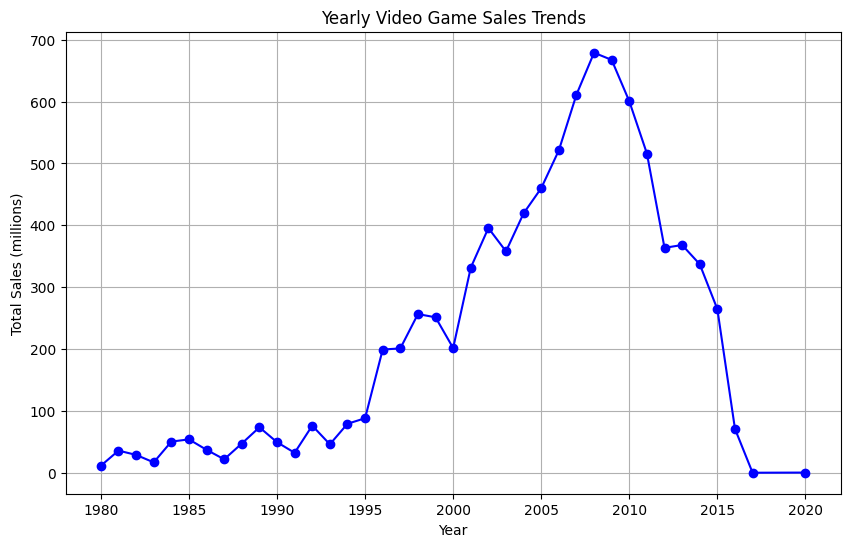

In [16]:
# Group the data by 'Year' and calculate the sum of global sales for each year
yearly_sales = df.groupby('Year')['Global_Sales'].sum()
# Create a line chart to visualize the yearly sales trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.title('Yearly Video Game Sales Trends')
plt.grid(True)
plt.show()

Are there any significant correlations between game sales and other factors
like year of release, genre, or publisher?

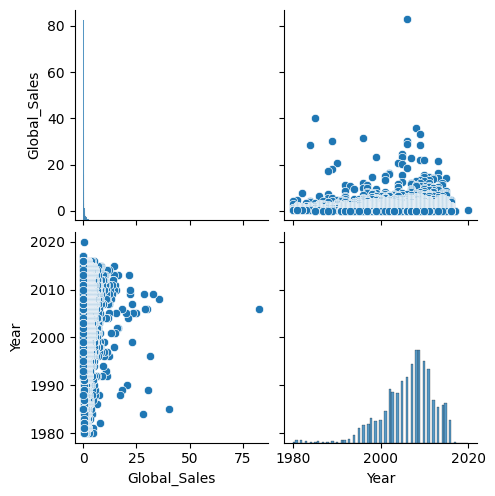

In [17]:
# Create a pairplot to visualize correlations between game sales, year of release, and publisher
sns.pairplot(df[['Global_Sales', 'Year', 'Publisher']])
plt.show()

How have the sales trends evolved over the years in each region?

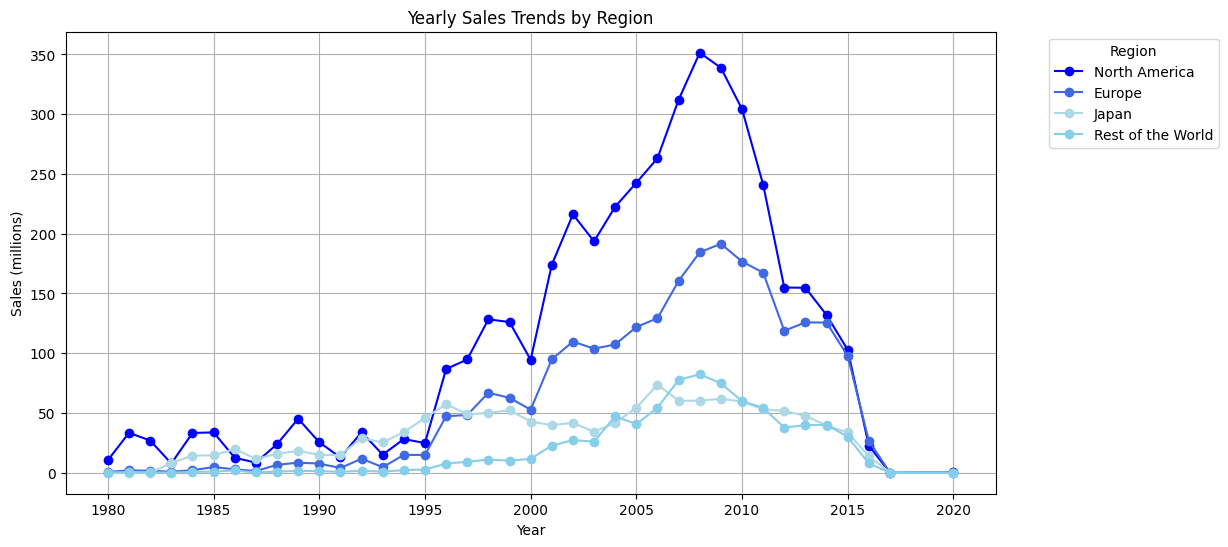

In [18]:
# Group the data by 'Year' and calculate the sum of sales for each region for every year
yearly_sales_by_region = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
# Create line plots to visualize yearly sales trends in each region
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['NA_Sales'], label='North America', marker='o', color='blue')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['EU_Sales'], label='Europe', marker='o', color='royalblue')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['JP_Sales'], label='Japan', marker='o', color='lightblue')
plt.plot(yearly_sales_by_region.index, yearly_sales_by_region['Other_Sales'], label='Rest of the World', marker='o', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Sales (millions)')
plt.title('Yearly Sales Trends by Region')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

What percentage of the global video game market do each of the
regions hold?

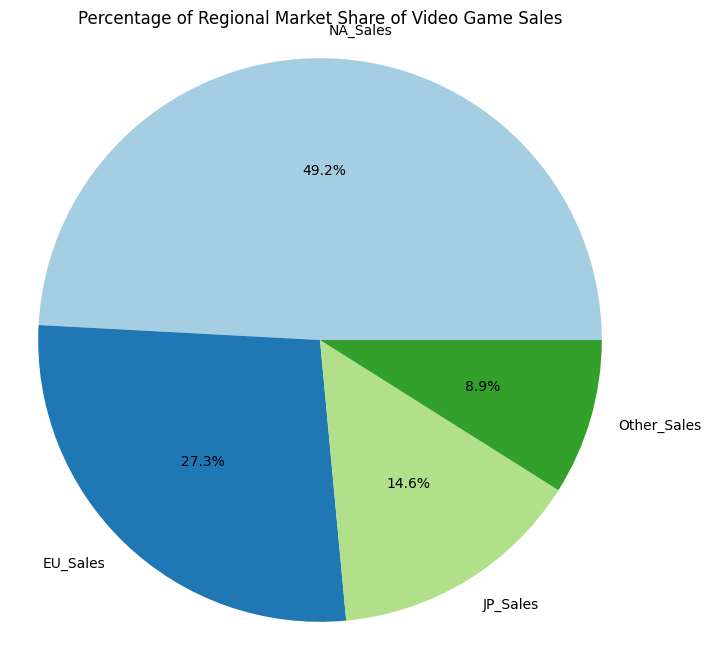

In [19]:
# Calculate the total global sales
total_global_sales = df['Global_Sales'].sum()
# Calculate the market share of each region
region_market_share = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum() / total_global_sales * 100
# Create a pie chart to visualize the regional market share
plt.figure(figsize=(8, 8))
plt.pie(region_market_share, labels=region_market_share.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.axis('equal')
plt.title('Percentage of Regional Market Share of Video Game Sales')
plt.show()

Wii Sports emerges as the top-selling game with an impressive 80 million sales, overshadowing others like Super Mario Bros, Mario Kart Wii, Wii Sports Resort, and more, which all fall within a similar range. Among gaming platforms, PS2 stands out as the leading platform, followed closely by X360, PS3, Wii, DS, and PS. Globally, action, sports, and shooters dominate game sales, with role-playing games following closely. Nintendo holds a strong position as an undefeated game publisher, with Electronic Arts and Activision trailing closely. North America emerges as the primary region for game consumption, surpassing other regions. The peak in game consumption and sales occurred in 2009/2010, followed by a decline the next year, although it's noteworthy that the upward trend began in 1996. This sales pattern is consistent across all regions.

This VGSales analysis gives important information about the video game industry. It shows which games are doing the best, which types are the most popular, what gaming systems people prefer, and how trends have changed over time.

Game developers, publishers, and marketers can use these insights to make smart decisions and adjust their strategies to do better in the competitive gaming market. It's important to note that this analysis is based on the data we have in the dataset, and to draw even more solid conclusions, additional research or data collection may be necessary.

If we want to dive even deeper, we can add more external data sources or use advanced statistical techniques for a more thorough understanding. This would provide us with even more valuable insights